In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Milk_Price.csv')
df

,Milk_Qty,Milk_Price
0,1,54
1,2,108
2,3,162
3,4,216
4,5,270
5,6,324
6,7,378
7,8,432
8,9,486
9,10,540


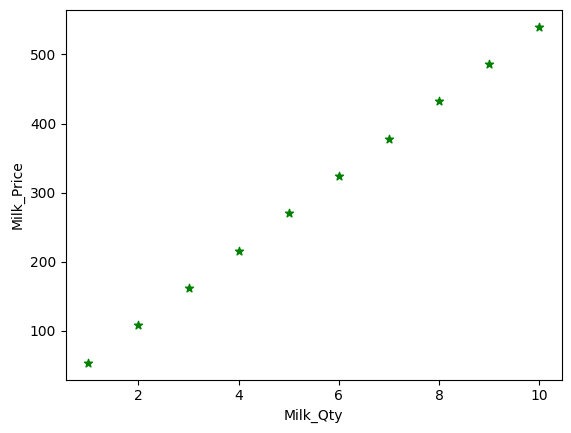

In [3]:
%matplotlib inline
plt.xlabel('Milk_Qty')
plt.ylabel('Milk_Price')
plt.scatter(df.Milk_Qty,df.Milk_Price,color='green',marker='*')

In [4]:
x = df.drop('Milk_Price',axis='columns')
x

,Milk_Qty
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [5]:
y = df.Milk_Price
y

0     54
1    108
2    162
3    216
4    270
5    324
6    378
7    432
8    486
9    540
Name: Milk_Price, dtype: int64

In [6]:
# Create linear regression object
model = linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

****(1) Predict price of milk with Qty = 11 lt****

In [7]:
model.predict([[11]])

C:\Users\VINOD VM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([594.])

**Y = m * X + b (m is coefficient and b is intercept)**

In [8]:
t = 11*54
t

594

In [9]:
model.coef_

array([54.])

In [10]:
model.intercept_

0.0

**(1) Predict price of milk with Qty = 15.75 lt**

In [11]:
model.predict([[15.75]])

C:\Users\VINOD VM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([850.5])

In [12]:
t = 15.75*54
t

850.5

<h3 style="color:purple">Generate CSV file with list of home price predictions</h3>

In [13]:
qty_df = pd.read_csv("Milk_Price List.csv")
qty_df

,Milk_Qty
0,15.00
1,15.50
2,15.85
3,16.00
4,17.25
5,18.00
6,18.68
7,18.25
8,21.20
9,22.00


In [14]:
#Prediction Result
p = model.predict(qty_df)
p

array([  810.  ,   837.  ,   855.9 ,   864.  ,   931.5 ,   972.  ,
        1008.72,   985.5 ,  1144.8 ,  1188.  ,  1228.5 ,  2700.  ,
        2731.32,  2632.5 ,  1757.7 ,  1782.  ,  2040.12,  3275.1 ,
        5483.16,  5508.  ,  5580.9 , 81000.  ])

In [15]:
#Adding Corresponding price againist the qty
qty_df['Milk_Prices']=p
qty_df

,Milk_Qty,Milk_Prices
0,15.00,810.00
1,15.50,837.00
2,15.85,855.90
3,16.00,864.00
4,17.25,931.50
5,18.00,972.00
6,18.68,1008.72
7,18.25,985.50
8,21.20,1144.80
9,22.00,1188.00


In [17]:
qty_df.to_csv("MilkPrice_Predictions.csv")

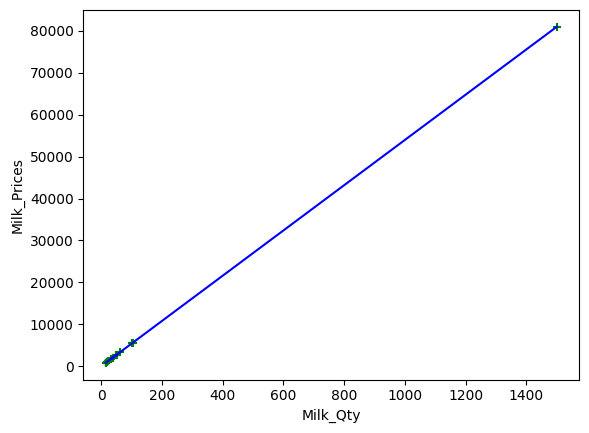

In [20]:
%matplotlib inline
plt.xlabel('Milk_Qty')
plt.ylabel('Milk_Prices')
plt.scatter(qty_df.Milk_Qty,qty_df.Milk_Prices,color='green',marker='+')
plt.plot(qty_df.Milk_Qty,model.predict(qty_df[['Milk_Qty']]),color='b')